In [1]:
import base64
import os

from openai import OpenAI
from openai.types.images_response import ImagesResponse
import PIL.Image

In [2]:
client = OpenAI(
    api_key=os.getenv('OPENAI_API_KEY'),
    base_url=os.getenv("OPENAI_BASE_URL"),
    organization=os.getenv("ORGANIZATION_ID", "organization_id"),
)

In [3]:
PROMPT = "An eco-friendly computer from the 90s in the style of vaporwave"

response: ImagesResponse = client.images.generate(
  model="dall-e-3",
  n=1,
  # prompt="a white siamese cat",
  prompt=PROMPT,
  quality="standard",
  response_format="b64_json",
  # size="1024x1024",
  # size="512x512",
  size="256x256",
  # size="64x64",
  # style=
  user="user_id",
)

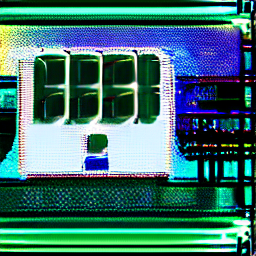

In [4]:
b64_json = response.data[0].b64_json
image_data = base64.b64decode(b64_json)
image_file = "test.png"

with open(image_file, mode="wb") as png:
    png.write(image_data)

image: PIL.Image.Image = PIL.Image.open("test.png")
image